In [1]:
#Call required libraries
import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns
import chart_studio.plotly as py # For World map,  pip install chart_studio
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objects as go
from sklearn.cluster import KMeans, AffinityPropagation #For clustering
from sklearn.preprocessing import StandardScaler  # For scaling dataset

In [2]:
wh = pd.read_csv("2019.csv") #Read the dataset
wh.columns =['Overall rank', 'Country','Happiness score', 'GDP per capita'
             ,'Social support', 'Healthy life expectancy',
             'Freedom of choice', 'Generosity','Perceptions of corruption'] 
wh.head()

,Overall rank,Country,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom of choice,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
wh.describe()

,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom of choice,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [4]:
print("Dimension of dataset:")
wh.dtypes

Dimension of dataset:


Overall rank                   int64
Country                       object
Happiness score              float64
GDP per capita               float64
Social support               float64
Healthy life expectancy      float64
Freedom of choice            float64
Generosity                   float64
Perceptions of corruption    float64
dtype: object

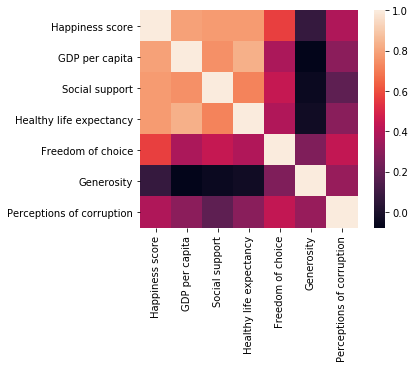

In [5]:
wh1 = wh.drop(['Overall rank','Country'],axis=1) #Subsetting the data

cor = wh1.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map, colors: cmap="gist_heat", cmap="RdBu"

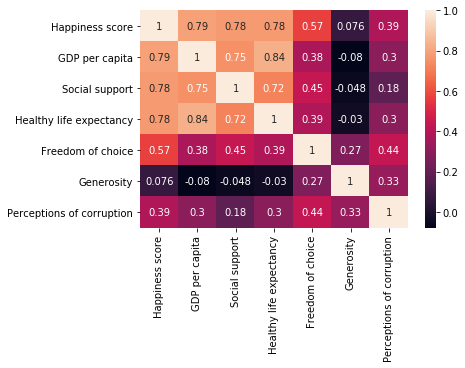

In [6]:
#Pearson Correlation
sns.heatmap(cor, annot=True)

In [7]:
#Correlation options are pearson, spearman or kendall.
spearman_cormatrix= wh1.corr(method='spearman')
spearman_cormatrix

,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom of choice,Generosity,Perceptions of corruption
Happiness score,1.000000,0.814483,0.816181,0.807275,0.551974,0.070483,0.217348
GDP per capita,0.814483,1.000000,0.768539,0.851513,0.393426,-0.041304,0.223203
Social support,0.816181,0.768539,1.000000,0.725997,0.449491,0.007695,0.114017
Healthy life expectancy,0.807275,0.851513,0.725997,1.000000,0.412906,-0.006773,0.165309
Freedom of choice,0.551974,0.393426,0.449491,0.412906,1.000000,0.324146,0.403586
Generosity,0.070483,-0.041304,0.007695,-0.006773,0.324146,1.000000,0.286171
Perceptions of corruption,0.217348,0.223203,0.114017,0.165309,0.403586,0.286171,1.000000


In [8]:
#Ref: https://plot.ly/python/choropleth-maps/
data = dict(type = 'choropleth', 
           locations = wh['Country'],
           locationmode = 'country names',
           z = wh['Happiness score'], 
           text = wh['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Happiness Index 2019', 
             geo = dict(showframe = False, 
                       projection = {'type': 'equirectangular'}))
choromap = go.Figure(data = [data], layout=layout)
iplot(choromap)

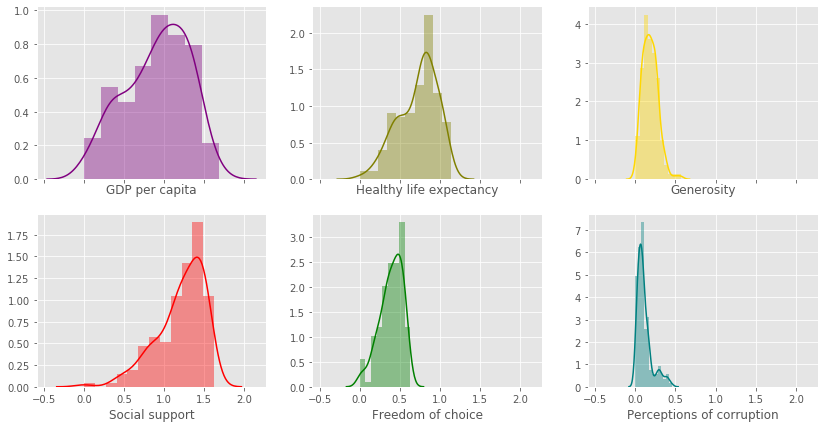

In [9]:
plt.style.use('ggplot')
f, axes = plt.subplots(2, 3, figsize=(14, 7), sharex=True)

sns.distplot( wh["GDP per capita"] , color="purple", ax=axes[0, 0])
sns.distplot( wh["Healthy life expectancy"] , color="olive", ax=axes[0, 1])
sns.distplot( wh["Generosity"] , color="gold", ax=axes[0, 2])
sns.distplot( wh["Social support"] , color="red", ax=axes[1, 0])
sns.distplot( wh["Freedom of choice"] , color="green", ax=axes[1, 1])
sns.distplot( wh["Perceptions of corruption"] , color="teal", ax=axes[1, 2])

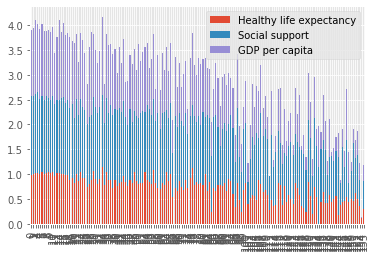

In [10]:
#Stacked Bar Chart
axis2 = wh[["Healthy life expectancy","Social support","GDP per capita"]].plot(kind="bar", stacked=True)
fig = axis2.get_figure()

In [11]:
#K means Clustering 
ss = StandardScaler()
ss.fit_transform(wh1)
def doKmeans(X, nclust=8):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(wh1, 8)
kmeans = pd.DataFrame(clust_labels)
wh1.insert((wh1.shape[1]),'kmeans',kmeans)

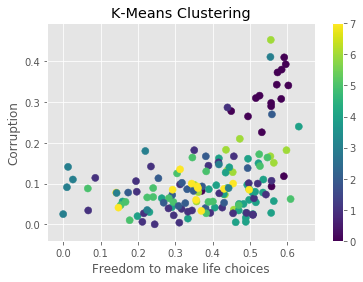

In [12]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Freedom of choice'],wh1['Perceptions of corruption'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Freedom to make life choices')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)

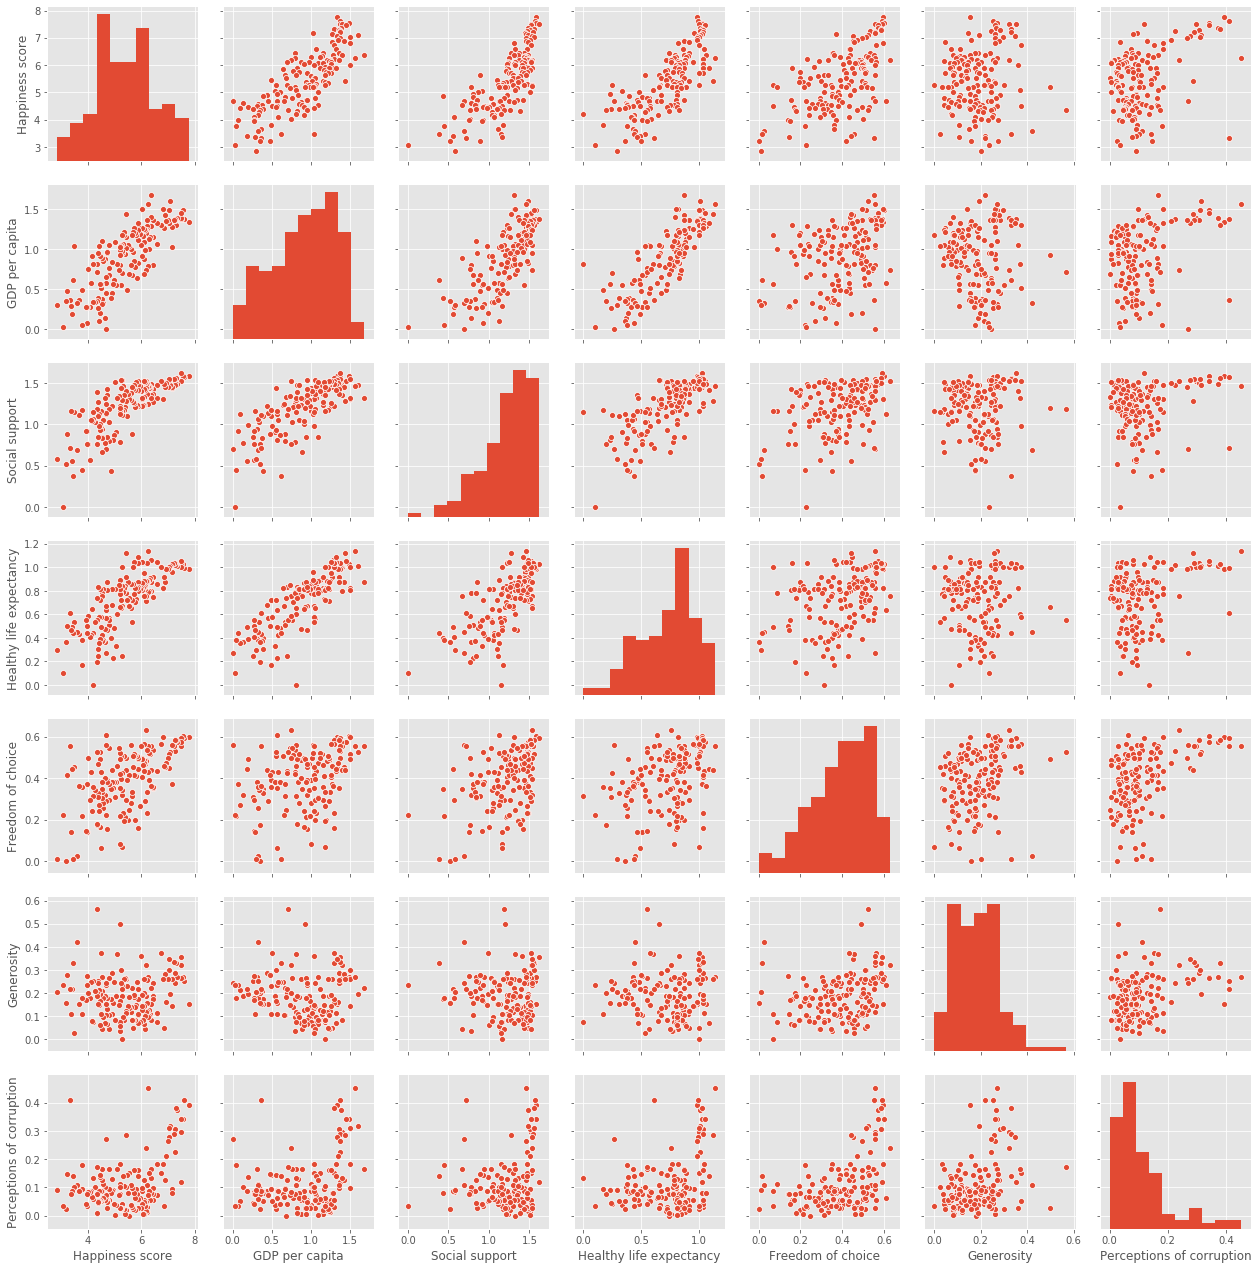

In [13]:
wh1 = wh1.drop(['kmeans'],axis=1)
sns.pairplot(wh1)
plt.show()

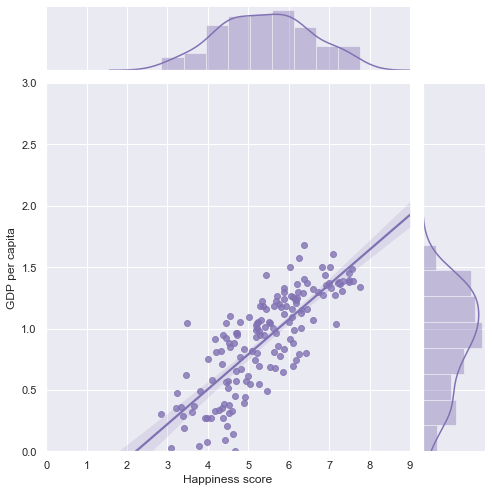

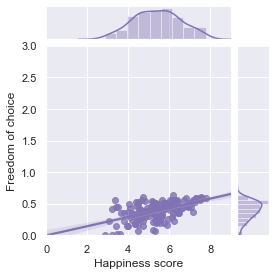

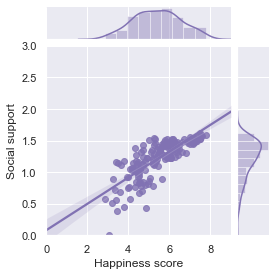

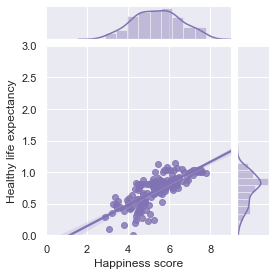

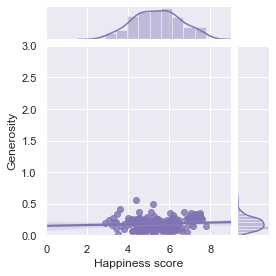

In [14]:
#Linear regression with marginal distributions
sns.set(style="darkgrid")
sns.jointplot("Happiness score", "GDP per capita", data=wh1,
                  kind="reg", truncate=False,
                  xlim=(0, 9), ylim=(0, 3),
                  color="m", height=7)
sns.jointplot("Happiness score", "Freedom of choice", data=wh1,
                  kind="reg", truncate=False,
                  xlim=(0, 9), ylim=(0, 3),
                  color="m", height=4)
sns.jointplot("Happiness score", "Social support", data=wh1,
                  kind="reg", truncate=False,
                  xlim=(0, 9), ylim=(0, 3),
                  color="m", height=4)
sns.jointplot("Happiness score", "Healthy life expectancy", data=wh1,
                  kind="reg", truncate=False,
                  xlim=(0, 9), ylim=(0, 3),
                  color="m", height=4)
sns.jointplot("Happiness score", "Generosity", data=wh1,
                  kind="reg", truncate=False,
                  xlim=(0, 9), ylim=(0, 3),
                  color="m", height=4)


In [15]:
wh[['Country', 'Generosity']].sort_values(by = 'Generosity', ascending = False).head(10)
#wh.sort_values(by='Generosity', ascending=False).head()

#Happiness score, GDP per capita, Social support, Healthy life expectancy, 
#Freedom of choice, Generosity, Perceptions of corruption

,Country,Generosity
130,Myanmar,0.566
91,Indonesia,0.498
146,Haiti,0.419
21,Malta,0.375
120,Kenya,0.372
94,Bhutan,0.370
51,Thailand,0.359
3,Iceland,0.354
14,United Kingdom,0.348
10,Australia,0.332
